In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Q**: How many total observations in data?

1338 rows x 6 columns

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/insurance.csv")
df

,age,sex,bmi,children,smoker,charge
0,19,0,28,0,1,16885
1,18,1,34,1,0,1726
2,28,1,33,3,0,4450
3,33,1,23,0,0,21985
4,32,1,29,0,0,3867
...,...,...,...,...,...,...
1333,50,1,31,3,0,10601
1334,18,0,32,0,0,2206
1335,18,0,37,0,0,1630
1336,21,0,26,0,0,2008


Q. Why you want to apply regression on selected dataset? Discuss full story behind dataset.
<br>

*Answer: Linear regression use to describe the relationships between a set of independent variables and the dependent variable. Linear regression produces a regression equation where the coefficients represent the relationship between each independent variable and the dependent variable. We can also use the equation to make predictions.

Here we have tried to predict the charge by taking using 3 independent variables of whom charge is dependent


Q: How many independent variables?

Answer:total - 3(age, bmi,smoker)

Q: Which is dependent variable?

Answer:total - 1(charge)

In [5]:
df.iloc[:,:].corr()

,age,sex,bmi,children,smoker,charge
age,1.000000,-0.020856,0.108394,0.042469,-0.025019,0.299009
sex,-0.020856,1.000000,0.047537,0.017163,0.076185,0.057293
bmi,0.108394,0.047537,1.000000,0.010477,0.002925,0.197563
children,0.042469,0.017163,0.010477,1.000000,0.007673,0.067999
smoker,-0.025019,0.076185,0.002925,0.007673,1.000000,0.787251
charge,0.299009,0.057293,0.197563,0.067999,0.787251,1.000000


*Q: Which are most useful variable in estimation? Prove using correlation.*

Here smoker value is must be more useful but for better result.
Above are the correlation values of every variable with respect to each other.


In [6]:
#building linear model
X1 = df.iloc[:,0]
Y = df.iloc[:,5]

X1_mean = np.mean(X1)
Y_mean = np.mean(Y)

num1 = 0
den1 = 0

for i in range(len(X1)):
  num1 += (X1[i] - X1_mean)*(Y[i] - Y_mean)
  den1 += (X1[i] - X1_mean)**2


b1 = num1/den1
b0 = Y_mean - (b1*X1_mean)            #Y = b0 + b1x1 

print(b0," ",b1)

3166.371798630016   257.7231082070386


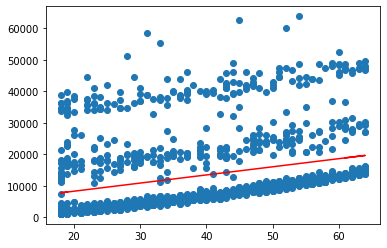

In [7]:
Y_pred = b0 + b1*X1
plt.scatter(X1,Y)
plt.plot(X1,Y_pred, linestyle='solid',  color='red')
plt.show()
 

In [8]:
#<-------------------- MULTIPLE REGRESSION---------------->
X = df[['age','bmi','smoker']]
Y = df['charge']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20 , random_state=1)
reg = linear_model.LinearRegression()
reg.fit(X_train , y_train)
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 -11214.836762360776
Coefficients: 
 [  258.87724371   303.98932638 23725.33797032]


In [9]:
y_pre = reg.predict(X_test)


In [10]:
reg.score(X_train, y_train)

0.7451418212652725

In [11]:
reg.score(X_test, y_test)

0.7562835845957191

In [13]:
rms = mean_squared_error(y_test, y_pre, squared=False)
rms



0.6031753381543655